# 第７章 単語ベクトル  
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

### 60.単語ベクトルの読み込みと表示  
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

次の２つのページ　[1](https://blog.amedama.jp/entry/gensim-fasttext-pre-trained-word-vectors),　[2](https://stmind.hatenablog.com/entry/2017/06/18/230106)を参考にしてgensimから学習済単語ベクトル表現を利用する．)を参考にしてgensimから学習済単語ベクトル表現を利用する．

In [8]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [9]:
#初回
import gensim
import pickle

model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
with open('gensim-GoogleNews-vec.pkl', mode='wb') as fp:
    pickle.dump(model, fp)

In [2]:
#2回目以降
import pickle
with open('./gensim-GoogleNews-vec.pkl', mode='rb') as fp:
    model = pickle.load(fp)

In [12]:
#example
united_states = model['United_States']
print(united_states)
print(len(united_states))

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

### 61.単語の類似度  
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [14]:
#similarityメソッドでコサイン類似度が計算できる
model.similarity('United_States', 'U.S.')

0.73107743

### 62.類似度の高い単語10件  
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ

In [15]:
#most_similarメソッドのtopnパラメータを変更することで出力できる
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

typoや意味的または地理的に近いwordが登場している

### 63.加法構成性によるアナロジー  
”Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [28]:
#1
new_vector = model['Spain'] - model['Madrid'] + model['Athens']
model.similar_by_vector(new_vector)
#2
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.5168809294700623),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

Spain-Madidの国-首都の関係から，アテネを首都にもつギリシャ(Greece)が出現すると予想できる．実際，最も類似している．

### 64.アナロジーデータでの実験  
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

!wget http://download.tensorflow.org/data/questions-words.txt

:カテゴリ  
の後に該当カテゴリの単語列が並ぶ．途中gramから始まるカテゴリに切り替わり，ここまでが意味的な類似度に基づいており，gramから始まるカテゴリでは文法的な類似性に基づいている．

In [4]:
import pandas as pd

In [5]:
from tqdm import tqdm

with open('./questions-words.txt', mode='r') as f1, open('./word_analogy_data.txt', mode='w') as f2:
    for line in tqdm(f1):
        words = line.split()
        if words[0] == ':':
            category = words[1]
        else:
            expect_word, similality = model.most_similar(positive=[words[1], words[2]], negative=[words[0]], topn=1)[0]
            f2.write(' '.join([category] + words + [expect_word, str(similality)]))
            f2.write('\n')

44it [00:07,  5.51it/s]


KeyboardInterrupt: 

In [6]:
word_analogy_data = pd.read_csv('./word_analogy_data.txt', sep=' ', names=['category', 'word1', 'word2', 'word3', 'word4', 'predict_word', 'similality'])
word_analogy_data.head()

,category,word1,word2,word3,word4,predict_word,similality
0,capital-common-countries,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187
1,capital-common-countries,Athens,Greece,Bangkok,Thailand,Thailand,0.713767
2,capital-common-countries,Athens,Greece,Beijing,China,China,0.723578
3,capital-common-countries,Athens,Greece,Berlin,Germany,Germany,0.673462
4,capital-common-countries,Athens,Greece,Bern,Switzerland,Switzerland,0.491975


In [8]:
word_analogy_data['category'].unique()

array(['capital-common-countries', 'capital-world', 'currency',
       'city-in-state', 'family', 'gram1-adjective-to-adverb',
       'gram2-opposite', 'gram3-comparative', 'gram4-superlative',
       'gram5-present-participle', 'gram6-nationality-adjective',
       'gram7-past-tense', 'gram8-plural', 'gram9-plural-verbs'],
      dtype=object)

### 65. アナロジータスクでの正解率  
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [69]:
sem_cnt = 0
sem_correct = 0
syn_cnt = 0
syn_correct = 0
for i in range(len(word_analogy_data)):
    if 'gram' in word_analogy_data.iloc[i, 0]:
        syn_cnt += 1
        if word_analogy_data['word4'].iloc[i] == word_analogy_data['predict_word'].iloc[i]:
            syn_correct += 1
    else:
        sem_cnt += 1
        if word_analogy_data['word4'].iloc[i] == word_analogy_data['predict_word'].iloc[i]:
            sem_correct += 1
            
print(f'意味的アナロジーの正解率: {round(sem_correct/sem_cnt, 3)*100}%')
print(f'文法的アナロジーの正解率: {round(syn_correct/syn_cnt, 3)*100}%')
                                                             

意味的アナロジーの正解率: 73.1%
文法的アナロジーの正解率: 74.0%


### 66. WordSimilarity-353での評価  
[The WordSimilarity-353 Test Collection](https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ

【データセットの簡単な説明】  
ネイティブレベルの英語力を持った人間によって意味的な類似性を評価された353組の単語ペアのデータセット．各ファイルの最初の2列には単語のペアが含まれ、その後に被験者の個別評価の(浮動小数点)平均スコアが続く列が含まれる．

!unzip ./data/wordsim353.zip

In [4]:
word353 = pd.read_csv('./data/combined.csv')
word353.head()

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


In [5]:
word353['Word-Vector'] = [0 for _ in range(len(word353))]
for i in range(len(word353)):
    word353['Word-Vector'].iloc[i]\
    = model.similarity(word353['Word 1'].iloc[i], word353['Word 2'].iloc[i])


/var/folders/ny/fhftdtxj7yb8ywmlkkn_qg5m0000gn/T/ipykernel_69138/664792534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word353['Word-Vector'].iloc[i]\


In [6]:
word353.head()

,Word 1,Word 2,Human (mean),Word-Vector
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392


In [84]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(word353['Human (mean)'])
word2vec = np.array(word353['Word-Vector'])
r_spear, p_value = spearmanr(human, word2vec)

r_spear

0.7000166486272194

### 67.k-meansクラスタリング  
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

64で作成したword_analogy_dataのcapital-common-countriesカテゴリから国名を獲得し，modelからそれぞれのベクトルを得る

In [7]:
countries = list(word_analogy_data.loc[word_analogy_data['category']==\
                                  'capital-common-countries']['word2'].unique())
countries

['Greece',
 'Iraq',
 'Thailand',
 'China',
 'Germany',
 'Switzerland',
 'Egypt',
 'Australia',
 'Vietnam',
 'Cuba',
 'Finland',
 'Pakistan',
 'Afghanistan',
 'England',
 'Spain',
 'Russia',
 'Norway',
 'Canada',
 'France',
 'Italy',
 'Sweden',
 'Iran',
 'Japan']

In [8]:
#各国のベクトルを得る
vectors = [model[country] for country in countries]

In [93]:
#KMeansの実行
from sklearn.cluster import KMeans

kmeans = KMeans(n_init=10 ,n_clusters=5)
kmeans.fit(vectors)
#kmeans.labels_で各ベクトルのラベルがnp.arrayで獲得できる
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print(f'【cluster {i}】')
    cluster_countries = [countries[c] for c in cluster]
    print(*cluster_countries, sep='/')

【cluster 0】
Thailand/China/Australia/Vietnam/Japan
【cluster 1】
Greece/Germany/Switzerland/Egypt/England/Spain/Russia/France/Italy
【cluster 2】
Iraq/Pakistan/Afghanistan/Iran
【cluster 3】
Finland/Norway/Canada/Sweden
【cluster 4】
Cuba


例外もあるが，ざっくり  
0: アジア  
1: ヨーロッパ  
2: 中東  
3: 北欧  
4: 南米 

### 68.Ward法によるクラスタリング  


国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．  
[実装参考](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram),[手法参考](https://ja.wikipedia.org/wiki/%E3%82%A6%E3%82%A9%E3%83%BC%E3%83%89%E6%B3%95)

ウォード法は凝集型クラスタリングの一種で最も距離の近いクラスタのペアを結合する．適当な階層で切れば所望のクラスタ数にできる．クラスタP,Qの距離の指標はある集合Cの重心から各要素のでのユークリッド距離の二乗和を示すE(C)を用いて定義する．  
  
$$ E(C) = \sum_{c\in C} (\textbf{x}_c - \textbf{x}_g)^2$$  
$$ d(P, Q) = E(P \cup Q) - E(P) - E(Q)$$

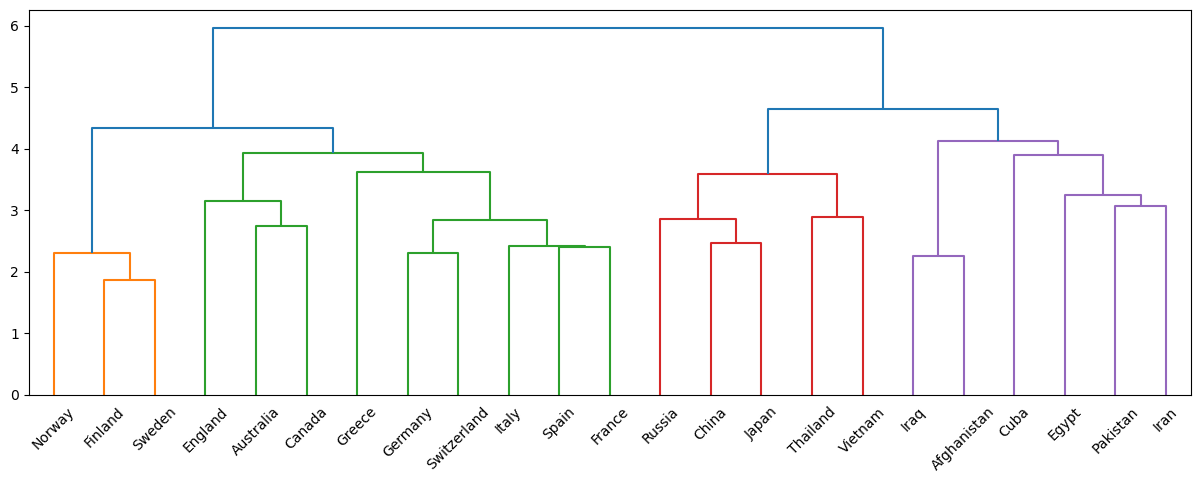

In [94]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
link = linkage(vectors, method='ward')
dendrogram(link, labels=countries)
plt.show()

### 69.t-SNEによる可視化  
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ  
[参考](https://qiita.com/g-k/items/120f1cf85ff2ceae4aba)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bhtsne

In [ ]:
embedded = bhtsne.tsne(np.array(vectors).astype(np.float64), dimensions=2, rand_seed=100)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()

In [ ]:
word_analogy_data.loc[word_analogy_data['category']=='capital-world']['word2'].unique()